In [1]:
from keras.models import load_model
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
os.environ['SM_FRAMEWORK'] = "tf.keras"
import segmentation_models as sm

2023-11-25 16:26:55.261376: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-25 16:26:57.146835: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-11-25 16:26:57.146925: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-11-25 16:26:57.146932: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

Segmentation Models: using `tf.keras` framework.


In [11]:
total_loss = sm.losses.categorical_focal_jaccard_loss
jaccard_coef = sm.metrics.iou_score

In [3]:
model = load_model("models/landcover_25_epochs_RESNET_backbone_batch16.hdf5", compile=False)

2023-11-25 16:27:13.791083: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-25 16:27:14.038055: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/aayush/anaconda3/envs/fuseenv/lib/python3.7/site-packages/cv2/../../lib64:
2023-11-25 16:27:14.038108: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2023-11-25 16:27:14.038946: I tensorflo

In [4]:
import os

In [5]:
!nvidia-smi

Sat Nov 25 16:27:24 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.129.03             Driver Version: 535.129.03   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce MX350           On  | 00000000:01:00.0 Off |                  N/A |
| N/A   36C    P8              N/A / ERR! |      6MiB /  2048MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [22]:
image_path = 'Data/val_images/val/M-33-20-D-c-4-2.tifpatch_023.tif'

In [23]:
# image_path = 'tile_36.jpg'

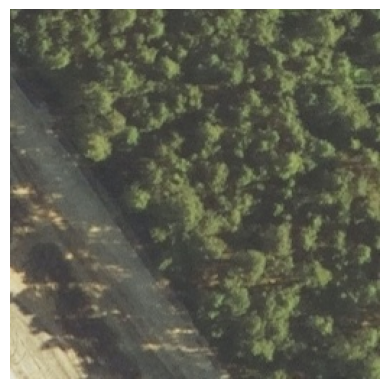

In [24]:
img = cv2.imread(image_path,1)
# img = cv2.resize(img, (256, 256))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis('off')
plt.show()

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
img.shape

(256, 256, 3)

In [27]:
scaler = MinMaxScaler()

In [28]:
BACKBONE = 'resnet34'
preprocess_input = sm.get_preprocessing(BACKBONE)

In [29]:
# img = (img - img.min()) / (img.max() - img.min())
img = scaler.fit_transform(img.reshape(-1, img.shape[-1])).reshape(img.shape)
img = preprocess_input(img)  #Preprocess based on the pretrained backbone...

In [30]:
img.shape

(256, 256, 3)

In [31]:
in_img = img.reshape((1, 256, 256, 3))


In [32]:
in_img.shape

(1, 256, 256, 3)

In [33]:
pred = model.predict(in_img)
pred_margmax = np.argmax(pred,axis=3)

1/1 [==============================] - 0s 148ms/step


In [34]:
pred_margmax[0].shape

(256, 256)

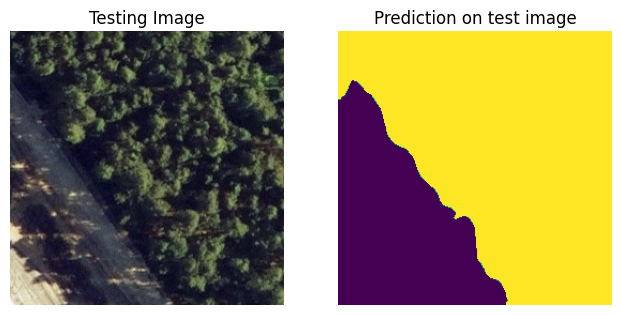

In [35]:
plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(img)
plt.axis('off')
plt.subplot(232)
plt.title('Prediction on test image')
plt.imshow(pred_margmax[0])
plt.axis('off')
plt.show()